# Range accrual under Vasicek model or CIR model

In [1]:
#import library
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pylab as plt
from random import gauss
from scipy.stats import norm
import pandas as pd

### Perform the pricing using a Monte-Carlo approach, providing with a confidence interval

The payoff of range accrual at time T (maturity date) is defined as follow:
$$ P_T = \frac{P}{N}\sum_{i=1}^N 1_{index(i) \in Range}$$

Where
$N = Trading \; days$

$ P = Notional$


Pricing this financial productio under Vasicek model is defined as follow:
$$P_0 = E\left[e^{-\int_{0}^{T} r_t dt} \frac{P}{N}\sum_{i=1}^{N}1_{index(i) \in Range}\right] $$

In [2]:
def confidence_interval_95(liste,x,nb_of_sims):
    x_std = np.std(liste)
    return [x - 1.96*x_std/np.sqrt(nb_of_sims), x + 1.96*x_std/np.sqrt(nb_of_sims)]

In [13]:
def VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps):
    T = dates[0]
    dt = (T-t) / nbSteps 
    std = sigma * np.sqrt( (1 - np.exp(-2*k*dt)) / (2*k) )
    myMCestimate = []
    for i in range(nbSimul):
        spotRate = r
        integralSpotRate = 0
        for j in range(nbSteps):
            integralSpotRate += spotRate #to compute the integral of the short rate process
            spotRate = spotRate * np.exp(-k*dt) + theta * (1 - np.exp(-k*dt)) + std * gauss(0.0,1.0)
        integralSpotRate *= dt
        RA_payoff = 0# initialize the payoff of range accrual
        indic = 0#indicatrice
        for n in range(N):
            if(K1<= S and S<=K2):
               indic = 1
        RA_payoff = P/N*indic#range accrual payoff
        myMCestimate.append(np.exp(-integralSpotRate) * RA_payoff)

    Price = np.mean(myMCestimate)
    CI = confidence_interval_95(myMCestimate,Price,nbSimul)
    return  Price,CI

In [14]:
nbSimul = 10000
nbSteps = 100
N = 10#trading day
P = 10#Notional
K1 = 100 #1st index in the range
K2 = 250#last index in the range
k = 0.5
theta = 0.04 #long term value of interest rate
sigma = 0.015
r = 0.02
t = 0
#S = [2**i for i in range(10)]#N and S has to be the same length
S = 100
dates = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #list of dates
print(f'Price of range accrual under Vasicek: {VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps)[0]}')
print(f'Confidence interval: {VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps)[1]}')

Price of range accrual under Vasicek: 0.7004302253876685
Confidence interval: [0.7003642741531879, 0.7025496390803929]


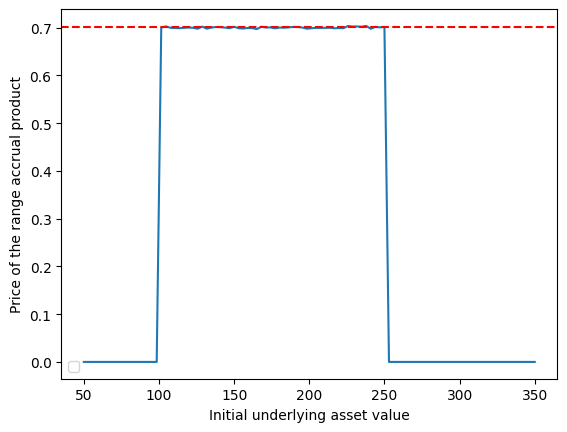

In [5]:
nbSimul = 1000
nbSteps = 100
N = 10
P = 10
K1 = 100
K2 = 250
k = 0.5
theta = 0.04
sigma = 0.015
r = 0.02
t = 0
S_range = np.linspace(50, 350, num=100)
dates = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

# prices of the range accrual product for each underlying asset value
Price_range = np.zeros(len(S_range))
for i in range(len(S_range)):
    Price_range[i] = VasicekRangeAccrualByMC(t, dates, k, K1, K2, N, P, S_range[i], theta, sigma, r, nbSimul, nbSteps)[0]

# plot the accrual range price function
plt.plot(S_range, Price_range)
plt.axhline(y=VasicekRangeAccrualByMC(t, dates, k, K1, K2, N, P, S, theta, sigma, r, nbSimul, nbSteps)[0], color='r', linestyle='--')
plt.xlabel('Initial underlying asset value')
plt.ylabel('Price of the range accrual product')
plt.legend()
plt.show()

### Provide with the 1st and 2nd order price function sensitivity with respect to parallel movements of the initial ZC bond rate curve.


In [22]:
def VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps):
    T = dates[0]
    dt = (T-t) / nbSteps 
    std = sigma * np.sqrt( (1 - np.exp(-2*k*dt)) / (2*k) )
    myMCestimate = []
    for i in range(nbSimul):
        spotRate = r
        integralSpotRate = 0
        for j in range(nbSteps):
            integralSpotRate += spotRate #to compute the integral of the short rate process
            spotRate = spotRate * np.exp(-k*dt) + theta * (1 - np.exp(-k*dt)) + std * gauss(0.0,1.0)
        integralSpotRate *= dt
        RA_payoff = 0# initialize the payoff of range accrual
        indic = 0#indicatrice
        for n in range(N):
          indic = 0
          for price in S:
              if K1<=price and price <= K2:
               indic = 1
               
        RA_payoff = P/N*indic#range accrual payoff
        myMCestimate.append(np.exp(-integralSpotRate) * RA_payoff)

    Price = np.mean(myMCestimate)
    CI = confidence_interval_95(myMCestimate,Price,nbSimul)
    return  Price,CI

In [18]:
def FirstOrderSensitivity(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps, eps):
    P1 = VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r+eps,nbSimul,nbSteps)[0]
    P2 =  VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r-eps,nbSimul,nbSteps)[0]
    return (P1-P2)/(2*eps)

In [7]:
def SecondOrderSensitivity(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps, eps):
    P1 = VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r+eps,nbSimul,nbSteps)[0]
    P2 = 2*VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r-eps,nbSimul,nbSteps)[0]
    P3 = VasicekRangeAccrualByMC(t,dates,k,K1,K2,N,P,S,theta,sigma,r-eps,nbSimul,nbSteps)[0]
    return (P1 - P2 + P3)/(eps)**2

In [23]:
nbSimul = 10000
nbSteps = 100
N = 10
P = 9
K1 = 100
K2 = 250
k = 0.5
theta = 0.04 #long term value of interest rate
sigma = 0.015
r = 0.02
t = 0
S = [2**i for i in range(10)]#N and S has to be the same length
dates = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] #list of dates
eps = 0.01
print(FirstOrderSensitivity(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps, eps))
print(SecondOrderSensitivity(t,dates,k,K1,K2,N,P,S,theta,sigma,r,nbSimul,nbSteps, eps))#the value is weird!

-1.266367619107428
-256.11128216050827


In [9]:
# other method:
def price_sensitivities(P, r0, delta_r, Theta):
    price_up = P(r0 + delta_r, Theta)
    price_down = P(r0 - delta_r, Theta)
    S = 0.5 * (price_up - price_down) / delta_r
    C = (price_up - 2 * P(r0, Theta) + price_down) / (delta_r ** 2)
    return S, C

In [10]:
k = 0.1
theta = 0.05
sigma = 0.02
r0 = 0.03

In [11]:
def P(r, Theta):
    k = Theta['k']
    theta = Theta['theta']
    sigma = Theta['sigma']
    T = Theta['T']
    B = (1 - np.exp(-k * T)) / k
    A = np.exp((theta - (sigma ** 2) / (2 * (k ** 2))) * (B - T) - (sigma ** 2) / (4 * k) * (B ** 2))
    return A * np.exp(-B * r)

In [12]:
Theta = {'k': 0.1, 'theta': 0.05, 'sigma': 0.02, 'T': 5}
delta_r = 0.01
S, C = price_sensitivities(P, r0, delta_r, Theta)
print('First order sensitivity:', S)
print('Second order sensitivity:', C) 

First order sensitivity: -3.3354552211233846
Second order sensitivity: 13.122300722858693


### Calibrate the interest rate model on the initial ZC bond value curve, extracted from the market

In [ ]:
""" Extracting ZC from a Market Curve """
path = r"IRMarketCurve.xlsx" 
book = pd.read_excel(path)

In [ ]:
xl = pd.ExcelFile(path)
d = []
for sheet_name in xl.sheet_names:
    df = xl.parse(sheet_name, index_col=None)
    d.append(df)
sheet = d[0]

In [ ]:
IRCurve = []
for row_index in range(len(sheet)):
    row= ""
    Lign = []
    for col in sheet.columns:
        value = sheet.at[row_index, col]
        Lign.append(value)
    IRCurve.append(Lign)

print(len(IRCurve))

33


In [ ]:
def extractZCCurve(IRCurve):# We need to modify this part tomorrow
   
    ZC = []
    
    for i in range(4): # The formula is valid for all rates with maturity < 1yr
        maturity = IRCurve[i+1][0] # beware of the indices
        ZCrate = IRCurve[i+1][2] #"To be filled" 
        ZCvalue = 1.0/(1+maturity*ZCrate) #"To be filled" 
        ZC.append([maturity,ZCrate,ZCvalue]) #to store both ZCRate at Value
    #sumOfZC = 0#zc value of maturity 1y
    sumOfZC = 1/(1+IRCurve[4][2])#zc value of maturity 1y
    for i in range(4,len(IRCurve)-1): # For swaps with maturity >= 2yr
        #sumOfZC +=...
        maturity = IRCurve[i+1][0]
        ZCvalue = (1-IRCurve[i+1][2]*sumOfZC)/(1 + IRCurve[i+1][2])#"To be filled" 
        ZCrate =ZCvalue**(-10/maturity)-1.0 #"To be filled" 
        ZC.append([maturity,ZCrate,ZCvalue]) #to store both ZCRate at Value
        sumOfZC += ZCvalue
        
    ZC = np.array(ZC) #to transform the list in np.array
    return ZC

ZCCurve = extractZCCurve(IRCurve)
print(ZCCurve)

[[2.50000000e-01 1.69000000e-02 9.95792776e-01]
 [5.00000000e-01 1.84000000e-02 9.90883868e-01]
 [1.00000000e+00 1.90800000e-02 9.81277230e-01]
 [2.00000000e+00 2.09100000e-02 9.59858709e-01]
 [3.00000000e+00 1.54998613e-01 9.57691342e-01]
 [4.00000000e+00 1.79763407e-01 9.36013325e-01]
 [5.00000000e+00 1.96087654e-01 9.14362689e-01]
 [6.00000000e+00 2.08500022e-01 8.92589970e-01]
 [7.00000000e+00 2.19000943e-01 8.70556918e-01]
 [8.00000000e+00 2.27570279e-01 8.48717013e-01]
 [9.00000000e+00 2.35217953e-01 8.26857679e-01]
 [1.00000000e+01 2.41994282e-01 8.05156686e-01]
 [1.10000000e+01 2.48195527e-01 7.83590417e-01]
 [1.20000000e+01 2.53301509e-01 7.62664137e-01]
 [1.30000000e+01 2.57491151e-01 7.42409604e-01]
 [1.40000000e+01 2.61335522e-01 7.22498788e-01]
 [1.50000000e+01 2.64740552e-01 7.03068814e-01]
 [1.60000000e+01 2.67732047e-01 6.84157433e-01]
 [1.70000000e+01 2.70471181e-01 6.65671263e-01]
 [1.80000000e+01 2.72829016e-01 6.47759632e-01]
 [1.90000000e+01 2.74962408e-01 6.303111

In [ ]:
IRCurveShifted = [IRCurve[0]]
for i in range(1,33):
    IRCurveShifted.append([IRCurve[i][0],IRCurve[i][1],IRCurve[i][2]+0.01])
ZCCurveShifted = extractZCCurve(IRCurveShifted)
print(ZCCurveShifted)

[[2.50000000e-01 2.69000000e-02 9.93319924e-01]
 [5.00000000e-01 2.84000000e-02 9.85998817e-01]
 [1.00000000e+00 2.90800000e-02 9.71741750e-01]
 [2.00000000e+00 3.09100000e-02 9.41779209e-01]
 [3.00000000e+00 2.32510551e-01 9.39210213e-01]
 [4.00000000e+00 2.69187280e-01 9.09054070e-01]
 [5.00000000e+00 2.93031982e-01 8.79418032e-01]
 [6.00000000e+00 3.10716429e-01 8.50148424e-01]
 [7.00000000e+00 3.25215411e-01 8.21106454e-01]
 [8.00000000e+00 3.36901399e-01 7.92721246e-01]
 [9.00000000e+00 3.47117074e-01 7.64777660e-01]
 [1.00000000e+01 3.56051362e-01 7.37435195e-01]
 [1.10000000e+01 3.64121913e-01 7.10659385e-01]
 [1.20000000e+01 3.70790294e-01 6.84912000e-01]
 [1.30000000e+01 3.76292660e-01 6.60200681e-01]
 [1.40000000e+01 3.81309133e-01 6.36198680e-01]
 [1.50000000e+01 3.85748776e-01 6.13018025e-01]
 [1.60000000e+01 3.89653636e-01 5.90676226e-01]
 [1.70000000e+01 3.93221513e-01 5.69070022e-01]
 [1.80000000e+01 3.96306767e-01 5.48320500e-01]
 [1.90000000e+01 3.99099741e-01 5.283083

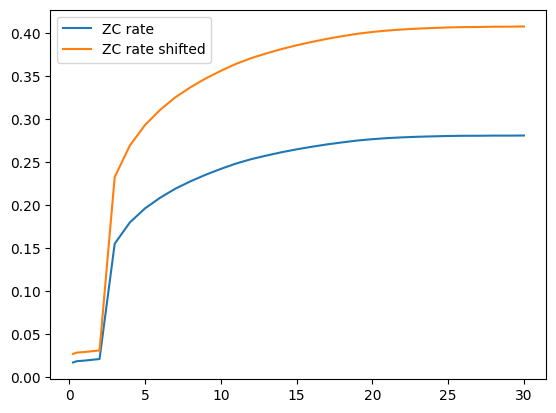

In [ ]:
plt.plot(ZCCurve[:,0],ZCCurve[:,1],label='ZC rate')
plt.plot(ZCCurve[:,0],ZCCurveShifted[:,1],label='ZC rate shifted')
plt.legend()
plt.show()

In [ ]:
def VasicekZCPrice(t,T,k,theta,sigma,rt):
    B = (1-np.exp(-k*(T-t)))/k# ~ (T-t)"To be filled"
    A =  np.exp((theta -0.5*sigma**2/k**2)*(B-T + t)-(0.25*sigma**2/k)*B**2)#"To be filled"
    ZC = A * np.exp(-B*rt)
    return ZC

In [ ]:
def LossFunction(param,ZCMarket,T): 
    #param>> vasicek model parameter
    #ZCmarket is the ZC Bond value observed in the market(will be a list)
    #T corresponding to the maturity(will be a list)
    
    log_k = param[0] # exponential transformation for a parameter
    theta = param[1]
    sigma = param[2]
    r = param[3]
    #t is time today and it is 0
    #k should be positive that's why np.exp(log_k) = k
    L = 0
    for i in range(len(ZCMarket)):
        L += (ZCMarket[i] - VasicekZCPrice(0,T[i],np.exp(log_k),theta,sigma,r))**2
    return [L,0,0,0] #For the function root to work, the return type should have the 
    #same length as the parameters

[0.07882985346058878, 0.03999810827092267, 0.01473292399288899, 0.019434960794607128]


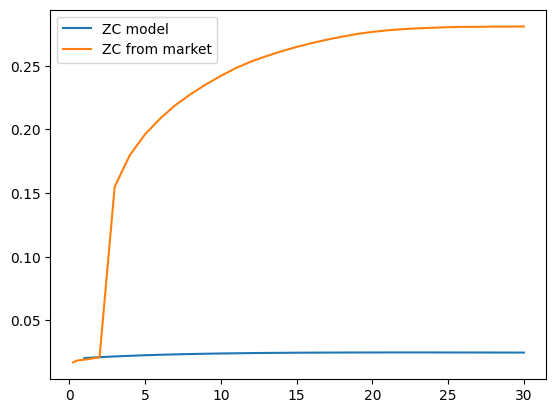

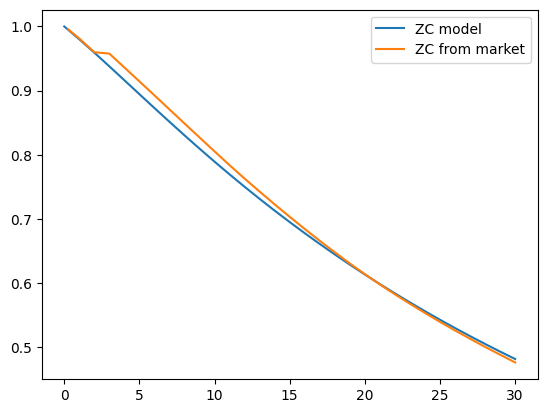

In [ ]:
from scipy.optimize import root
initParam = [np.log(k),theta,sigma,r]
calib = root(LossFunction, initParam, (ZCCurve[:,2],ZCCurve[:,0]))
calibParam = [np.exp(calib.x[0]),calib.x[1],calib.x[2],calib.x[3]]
print(calibParam)

# question 5 : plot

plt.plot([t for t in range(1,31)], [(VasicekZCPrice(0,t,calibParam[0],calibParam[1],calibParam[2],calibParam[3]))**(-1.0/t)-1 for t in range(1,31)],label='ZC model')
plt.plot(ZCCurve[:,0],ZCCurve[:,1],label='ZC from market')
plt.legend()
plt.show()

plt.plot([t for t in range(31)], [VasicekZCPrice(0,t,calibParam[0],calibParam[1],calibParam[2],calibParam[3]) for t in range(31)],label='ZC model')
plt.plot(ZCCurve[:,0],ZCCurve[:,2],label='ZC from market')
plt.legend()
plt.show()